In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/Ismail/Downloads/archive (18)/train.csv')

In [3]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')

In [8]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [9]:
df['Delivery Days']=(df['Ship Date']-df['Order Date']).dt.days

In [11]:
df['Delivery Days']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Delivery Days, Length: 9800, dtype: int64

In [12]:
df['Delivery Days'].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Delivery Days, dtype: float64

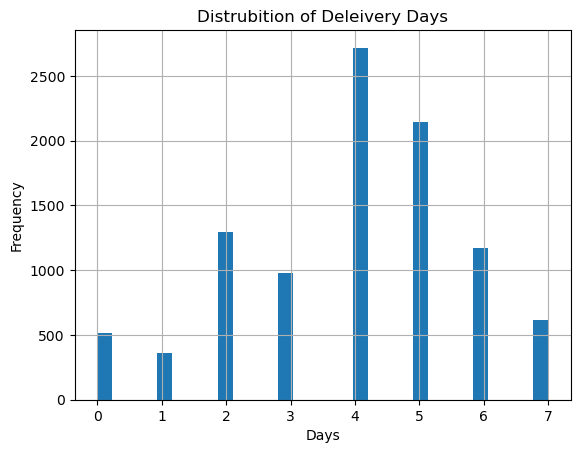

In [14]:
# Plot 
df['Delivery Days'].hist(bins=30)
plt.title('Distrubition of Deleivery Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.savefig('Distrubition of Deleivery Days', dpi=300 ,bbox_inches='tight')
plt.show()

In [16]:
df.groupby('Ship Mode')['Delivery Days'].agg(['count','mean','median','std'])

count      mean  median       std
Ship Mode                                        
First Class      1501  2.179214     2.0  0.774076
Same Day          538  0.044610     0.0  0.206637
Second Class     1902  3.249211     3.0  1.188201
Standard Class   5859  5.008363     5.0  1.010578

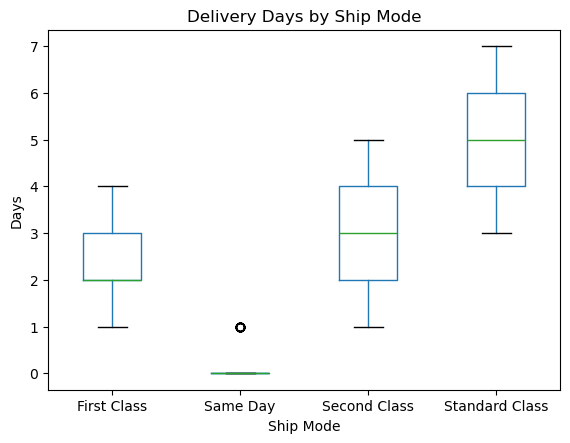

In [17]:
df.boxplot(column='Delivery Days',by='Ship Mode',grid=False)
plt.title('Delivery Days by Ship Mode')
plt.suptitle('')
plt.xlabel('Ship Mode')
plt.ylabel('Days')
plt.savefig('Delivery Days by Ship Mode',dpi=300,bbox_inches='tight')
plt.show()

In [19]:
region_means=df.groupby('Region')['Delivery Days'].mean()

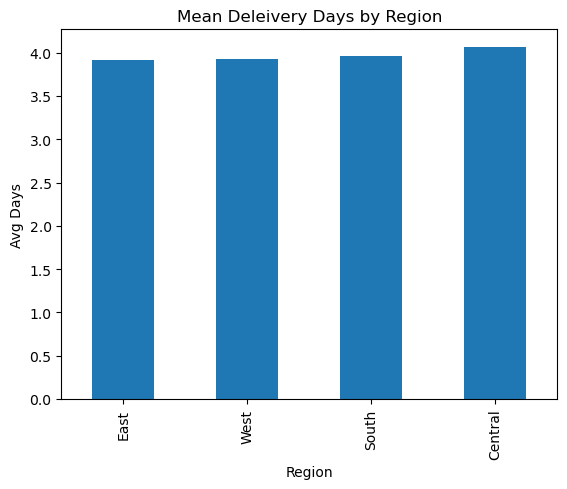

In [20]:
region_means.sort_values().plot(kind='bar')
plt.title('Mean Deleivery Days by Region')
plt.ylabel('Avg Days')
plt.savefig('Mean Deleivery Days by Region',dpi=300,bbox_inches='tight')
plt.show()

In [22]:
Monthly=df.set_index('Order Date').resample('ME')['Delivery Days'].mean()

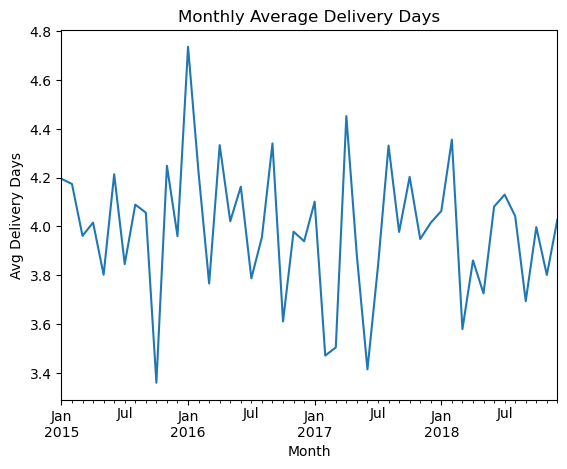

In [23]:
Monthly.plot()
plt.title('Monthly Average Delivery Days')
plt.xlabel('Month')
plt.ylabel('Avg Delivery Days')
plt.savefig('Monthly Average Delivery Days',dpi=300,bbox_inches='tight')
plt.show()

In [24]:
df['late'] = df['Delivery Days'] > 5
late_by_mode = df.groupby('Ship Mode')['late'].mean().sort_values()
late_by_region = df.groupby('Region')['late'].mean().sort_values()
print("Late rate by Ship Mode:\n", late_by_mode)
print("\nLate rate by Region:\n", late_by_region)

Late rate by Ship Mode:
 Ship Mode
First Class       0.000000
Same Day          0.000000
Second Class      0.000000
Standard Class    0.304659
Name: late, dtype: float64

Late rate by Region:
 Region
East       0.173429
South      0.177096
West       0.187580
Central    0.188845
Name: late, dtype: float64


In [29]:
monthly_by_mode = df.groupby(
    pd.Grouper(key='Order Date', freq='ME')
)['Delivery Days'].mean()

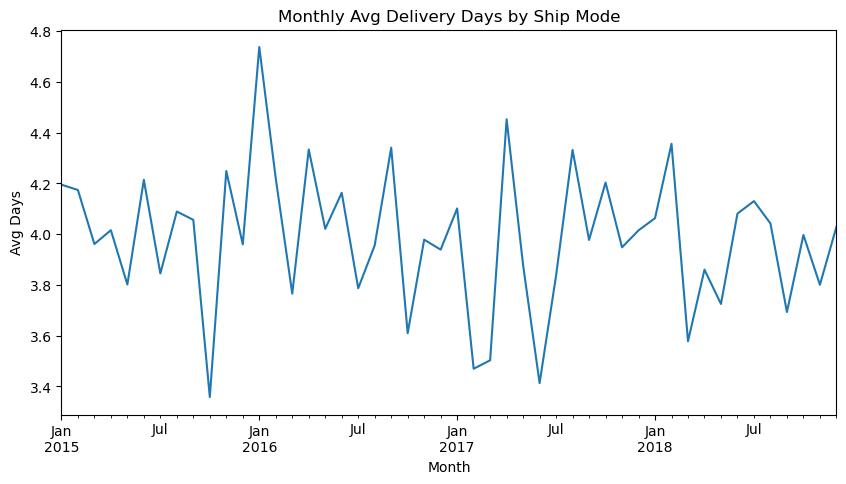

In [30]:
monthly_by_mode.plot(figsize=(10, 5))
plt.title("Monthly Avg Delivery Days by Ship Mode")
plt.ylabel("Avg Days")
plt.xlabel("Month")
plt.show()